# Compute Sky-View Factor

This example show how to compute sky-view factor from DEM, stored in a local file.

We are following the workflow:

1. Import libraries
2. Read and visualize DEM
3. Compute and visualize SVF
4. Save SVF to file

## Prepare environment

First we import the libraries. In addition to ``rvt.vis`` we need ``rasterio`` for reading and writing of files, ``numpy`` for numerical functions and ``matplotlib`` for plotting. We also define figure size and location.

Then we define input and output filenames.

In [1]:
# Matplotlib inline
%matplotlib inline

# Libraries
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
import rvt.vis

# Figure size and style
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
# Filenames
dem_path = '../test_data/TM1_564_146.tif'
svf_path = '../test_data/TM1_564_146.tif_SVF'

## Read DEM

Read DEM from file with ``rasterio``.

In [3]:
# Read DEM with rasterio
dem_dataset = rio.open(dem_path)
dem_arr = dem_dataset.read()[0]
dem_arr.shape

(1000, 1000)

In [4]:
# Get image parameters
t = dem_dataset.transform
x_res = t[0]
y_res = -t[4]

## Display DEM

Check if DEM was read correctly.

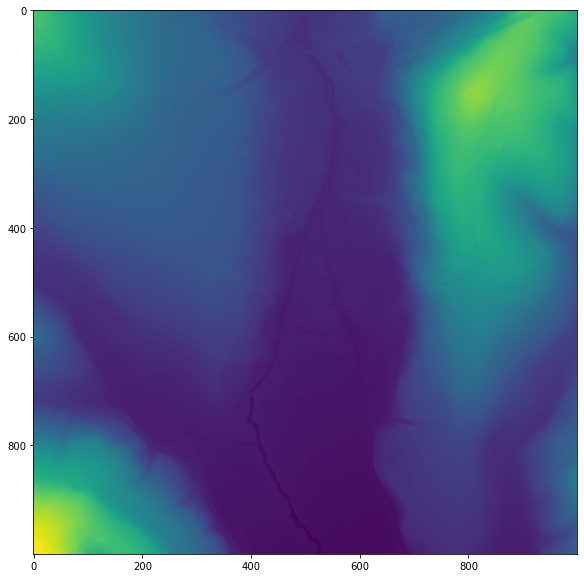

In [5]:
# Display image
plt.imshow(dem_arr)
plt.show()

## Compute sky-view factor

Use the function ``rvt.vis.sky_view_factor`` to compute sky-view factor. All the parameters are using default values. The result is a dict, se we have to get only SVF.

In [6]:
# Compute SVF
dict_svf_asvf_opns  = rvt.vis.sky_view_factor(dem=dem_arr, resolution=x_res)

In [7]:
# Get SVF from dict
svf_arr = dict_svf_asvf_opns["svf"]
svf_arr = svf_arr.astype('float32')


## Display sky-view factor

Show the resulting SVF.

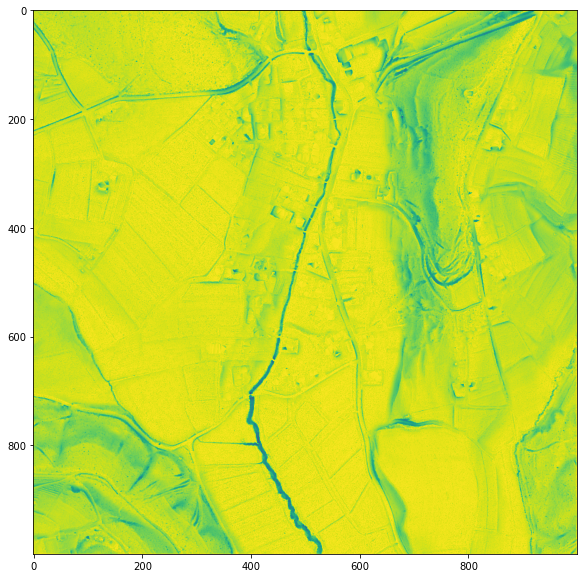

In [8]:
# Display SVF
plt.imshow(svf_arr)
plt.show()

## Save the result

At the end we can save the result to file. The file uses the same geographical information (projection, coordinates, pixel size) as the original image.

In [9]:
# Save SVF to file
profile = dem_dataset.profile
profile.update(dtype='float32')
output_svf = rio.open(svf_path, "w", **profile)
output_svf.write(np.array([svf_arr]))
output_svf.close()

## Compute openness and anisotropic SVF

We can compute also openness and anisotropic sky-view factor. The results are displayed at the end together with input data.

In [10]:
# Compute SVF
dict_svf_asvf_opns  = rvt.vis.sky_view_factor(dem=dem_arr, resolution=x_res, compute_svf=True, compute_opns=True, compute_asvf=True)

In [11]:
# SVF
svf_arr = dict_svf_asvf_opns["svf"]
svf_arr = svf_arr.astype('float32')
# openness
asvf_arr = dict_svf_asvf_opns["asvf"]
asvf_arr = asvf_arr.astype('float32')
# anisotropic SVF
opns_arr = dict_svf_asvf_opns["opns"]
opns_arr = opns_arr.astype('float32')

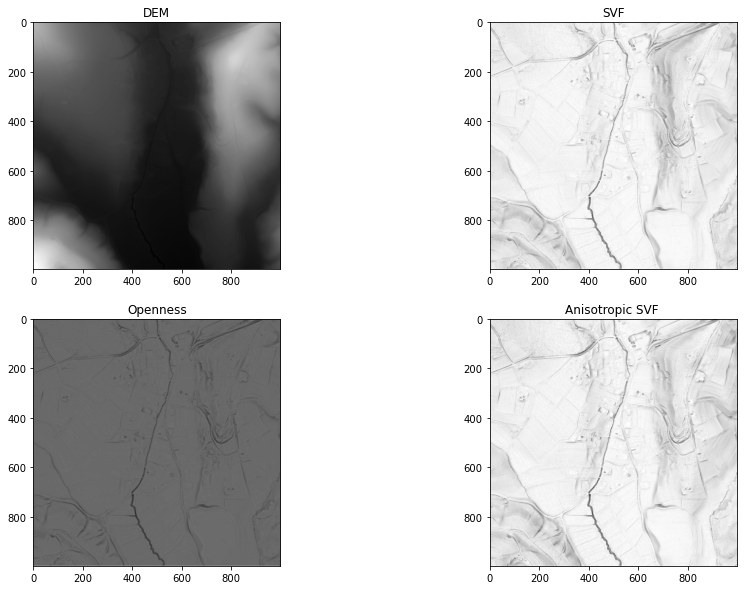

In [12]:
# Create plot
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(dem_arr, cmap='gray')
axarr[0,0].set_title('DEM')
axarr[0,1].imshow(svf_arr, cmap='gray')
axarr[0,1].set_title('SVF')
axarr[1,0].imshow(opns_arr, cmap='gray')
axarr[1,0].set_title('Openness')
axarr[1,1].imshow(asvf_arr, cmap='gray')
axarr[1,1].set_title('Anisotropic SVF ')
plt.show()